Zad2b

In [4]:
#data

import pandas as pd

df = pd.read_csv("C:/Users/micha/Downloads/Titanic-Dataset.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
#connection to  mongodb 
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017/")

In [6]:
mydb = client["mydatabase"]
mycol = mydb["titanic"]
mycol.delete_many({})

x = mycol.insert_many(df.to_dict(orient="Records"))

print(x.inserted_ids)

[ObjectId('68472afcb3b732ba5e1213a1'), ObjectId('68472afcb3b732ba5e1213a2'), ObjectId('68472afcb3b732ba5e1213a3'), ObjectId('68472afcb3b732ba5e1213a4'), ObjectId('68472afcb3b732ba5e1213a5'), ObjectId('68472afcb3b732ba5e1213a6'), ObjectId('68472afcb3b732ba5e1213a7'), ObjectId('68472afcb3b732ba5e1213a8'), ObjectId('68472afcb3b732ba5e1213a9'), ObjectId('68472afcb3b732ba5e1213aa'), ObjectId('68472afcb3b732ba5e1213ab'), ObjectId('68472afcb3b732ba5e1213ac'), ObjectId('68472afcb3b732ba5e1213ad'), ObjectId('68472afcb3b732ba5e1213ae'), ObjectId('68472afcb3b732ba5e1213af'), ObjectId('68472afcb3b732ba5e1213b0'), ObjectId('68472afcb3b732ba5e1213b1'), ObjectId('68472afcb3b732ba5e1213b2'), ObjectId('68472afcb3b732ba5e1213b3'), ObjectId('68472afcb3b732ba5e1213b4'), ObjectId('68472afcb3b732ba5e1213b5'), ObjectId('68472afcb3b732ba5e1213b6'), ObjectId('68472afcb3b732ba5e1213b7'), ObjectId('68472afcb3b732ba5e1213b8'), ObjectId('68472afcb3b732ba5e1213b9'), ObjectId('68472afcb3b732ba5e1213ba'), ObjectId('6

In [7]:
print(client.list_database_names())

['admin', 'config', 'local', 'mydatabase', 'world']


In [8]:
person = mycol.find_one({"Sex": "male"})
print(person)

{'_id': ObjectId('68472afcb3b732ba5e1213a1'), 'PassengerId': 1, 'Survived': 0, 'Pclass': 3, 'Name': 'Braund, Mr. Owen Harris', 'Sex': 'male', 'Age': 22.0, 'SibSp': 1, 'Parch': 0, 'Ticket': 'A/5 21171', 'Fare': 7.25, 'Cabin': nan, 'Embarked': 'S'}


In [9]:
nowa_osoba = {
    "PassengerId": 892,
    "Survived": 1,
    "Pclass": 2,
    "Name": "Kowalski, Mr. Jan",
    "Sex": "male",
    "Age": 30.0,
    "SibSp": 0,
    "Parch": 0,
    "Ticket": "XYZ 12345",
    "Fare": 25.0,
    "Cabin": None,      
    "Embarked": "C"
}
mycol.insert_one(nowa_osoba)

InsertOneResult(ObjectId('68472afcb3b732ba5e12171c'), acknowledged=True)

In [10]:
docs = list(mycol.find())
df = pd.DataFrame(docs)
df.drop(columns=['_id'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


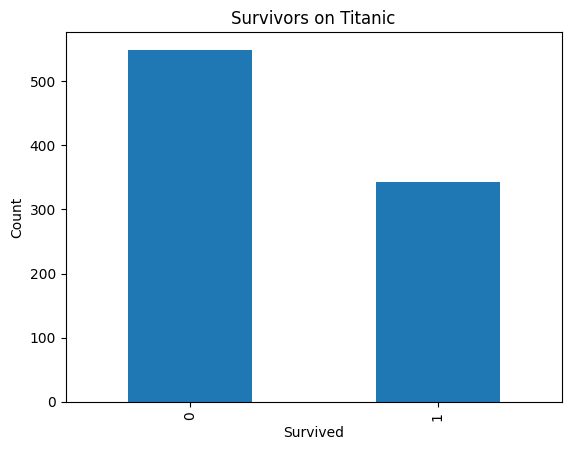

In [11]:
import matplotlib.pyplot as plt

df['Survived'].value_counts().plot(kind='bar')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survivors on Titanic')
plt.show()

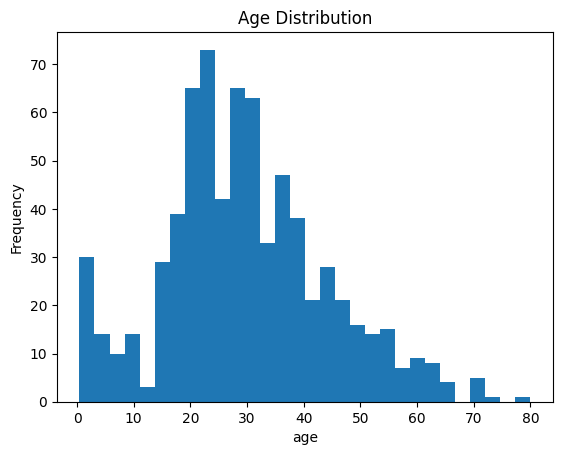

In [12]:
df['Age'].plot(kind="hist", bins=30)
plt.title("Age Distribution")
plt.xlabel("age")
plt.show()


Zad3

In [14]:
df = pd.read_csv("C:/Users/micha/.cache/kagglehub/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows/versions/1/imdb_top_1000.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None


In [15]:
mycol = mydb["imdb"]
mycol.delete_many({})

x = mycol.insert_many(df.to_dict(orient="records"))

In [16]:
pipeline = [
    {"$sort": {"Released_Year": 1, "IMDB_Rating": -1}},  
    {"$group": {
        "_id": "$Released_Year",
        "max_rating": {"$first": "$IMDB_Rating"},
        "title": {"$first": "$Series_Title"}
    }}
]

for row in mycol.aggregate(pipeline):
    print(row)

results = mycol.aggregate(pipeline)

df = pd.DataFrame(list(results))

{'_id': '1951', 'max_rating': 8.1, 'title': 'Ace in the Hole'}
{'_id': '1944', 'max_rating': 8.3, 'title': 'Double Indemnity'}
{'_id': '1975', 'max_rating': 8.7, 'title': "One Flew Over the Cuckoo's Nest"}
{'_id': '1955', 'max_rating': 8.2, 'title': 'Du rififi chez les hommes'}
{'_id': '1976', 'max_rating': 8.3, 'title': 'Taxi Driver'}
{'_id': '1921', 'max_rating': 8.3, 'title': 'The Kid'}
{'_id': '1949', 'max_rating': 8.1, 'title': 'White Heat'}
{'_id': '1956', 'max_rating': 8.0, 'title': 'The Killing'}
{'_id': '1987', 'max_rating': 8.3, 'title': 'Full Metal Jacket'}
{'_id': '1989', 'max_rating': 8.2, 'title': 'Indiana Jones and the Last Crusade'}
{'_id': '1995', 'max_rating': 8.6, 'title': 'Se7en'}
{'_id': '2000', 'max_rating': 8.5, 'title': 'Gladiator'}
{'_id': '2001', 'max_rating': 8.8, 'title': 'The Lord of the Rings: The Fellowship of the Ring'}
{'_id': '2009', 'max_rating': 8.4, 'title': '3 Idiots'}
{'_id': '1969', 'max_rating': 8.0, 'title': 'Butch Cassidy and the Sundance Kid'

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   _id         100 non-null    object 
 1   max_rating  100 non-null    float64
 2   title       100 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB
None


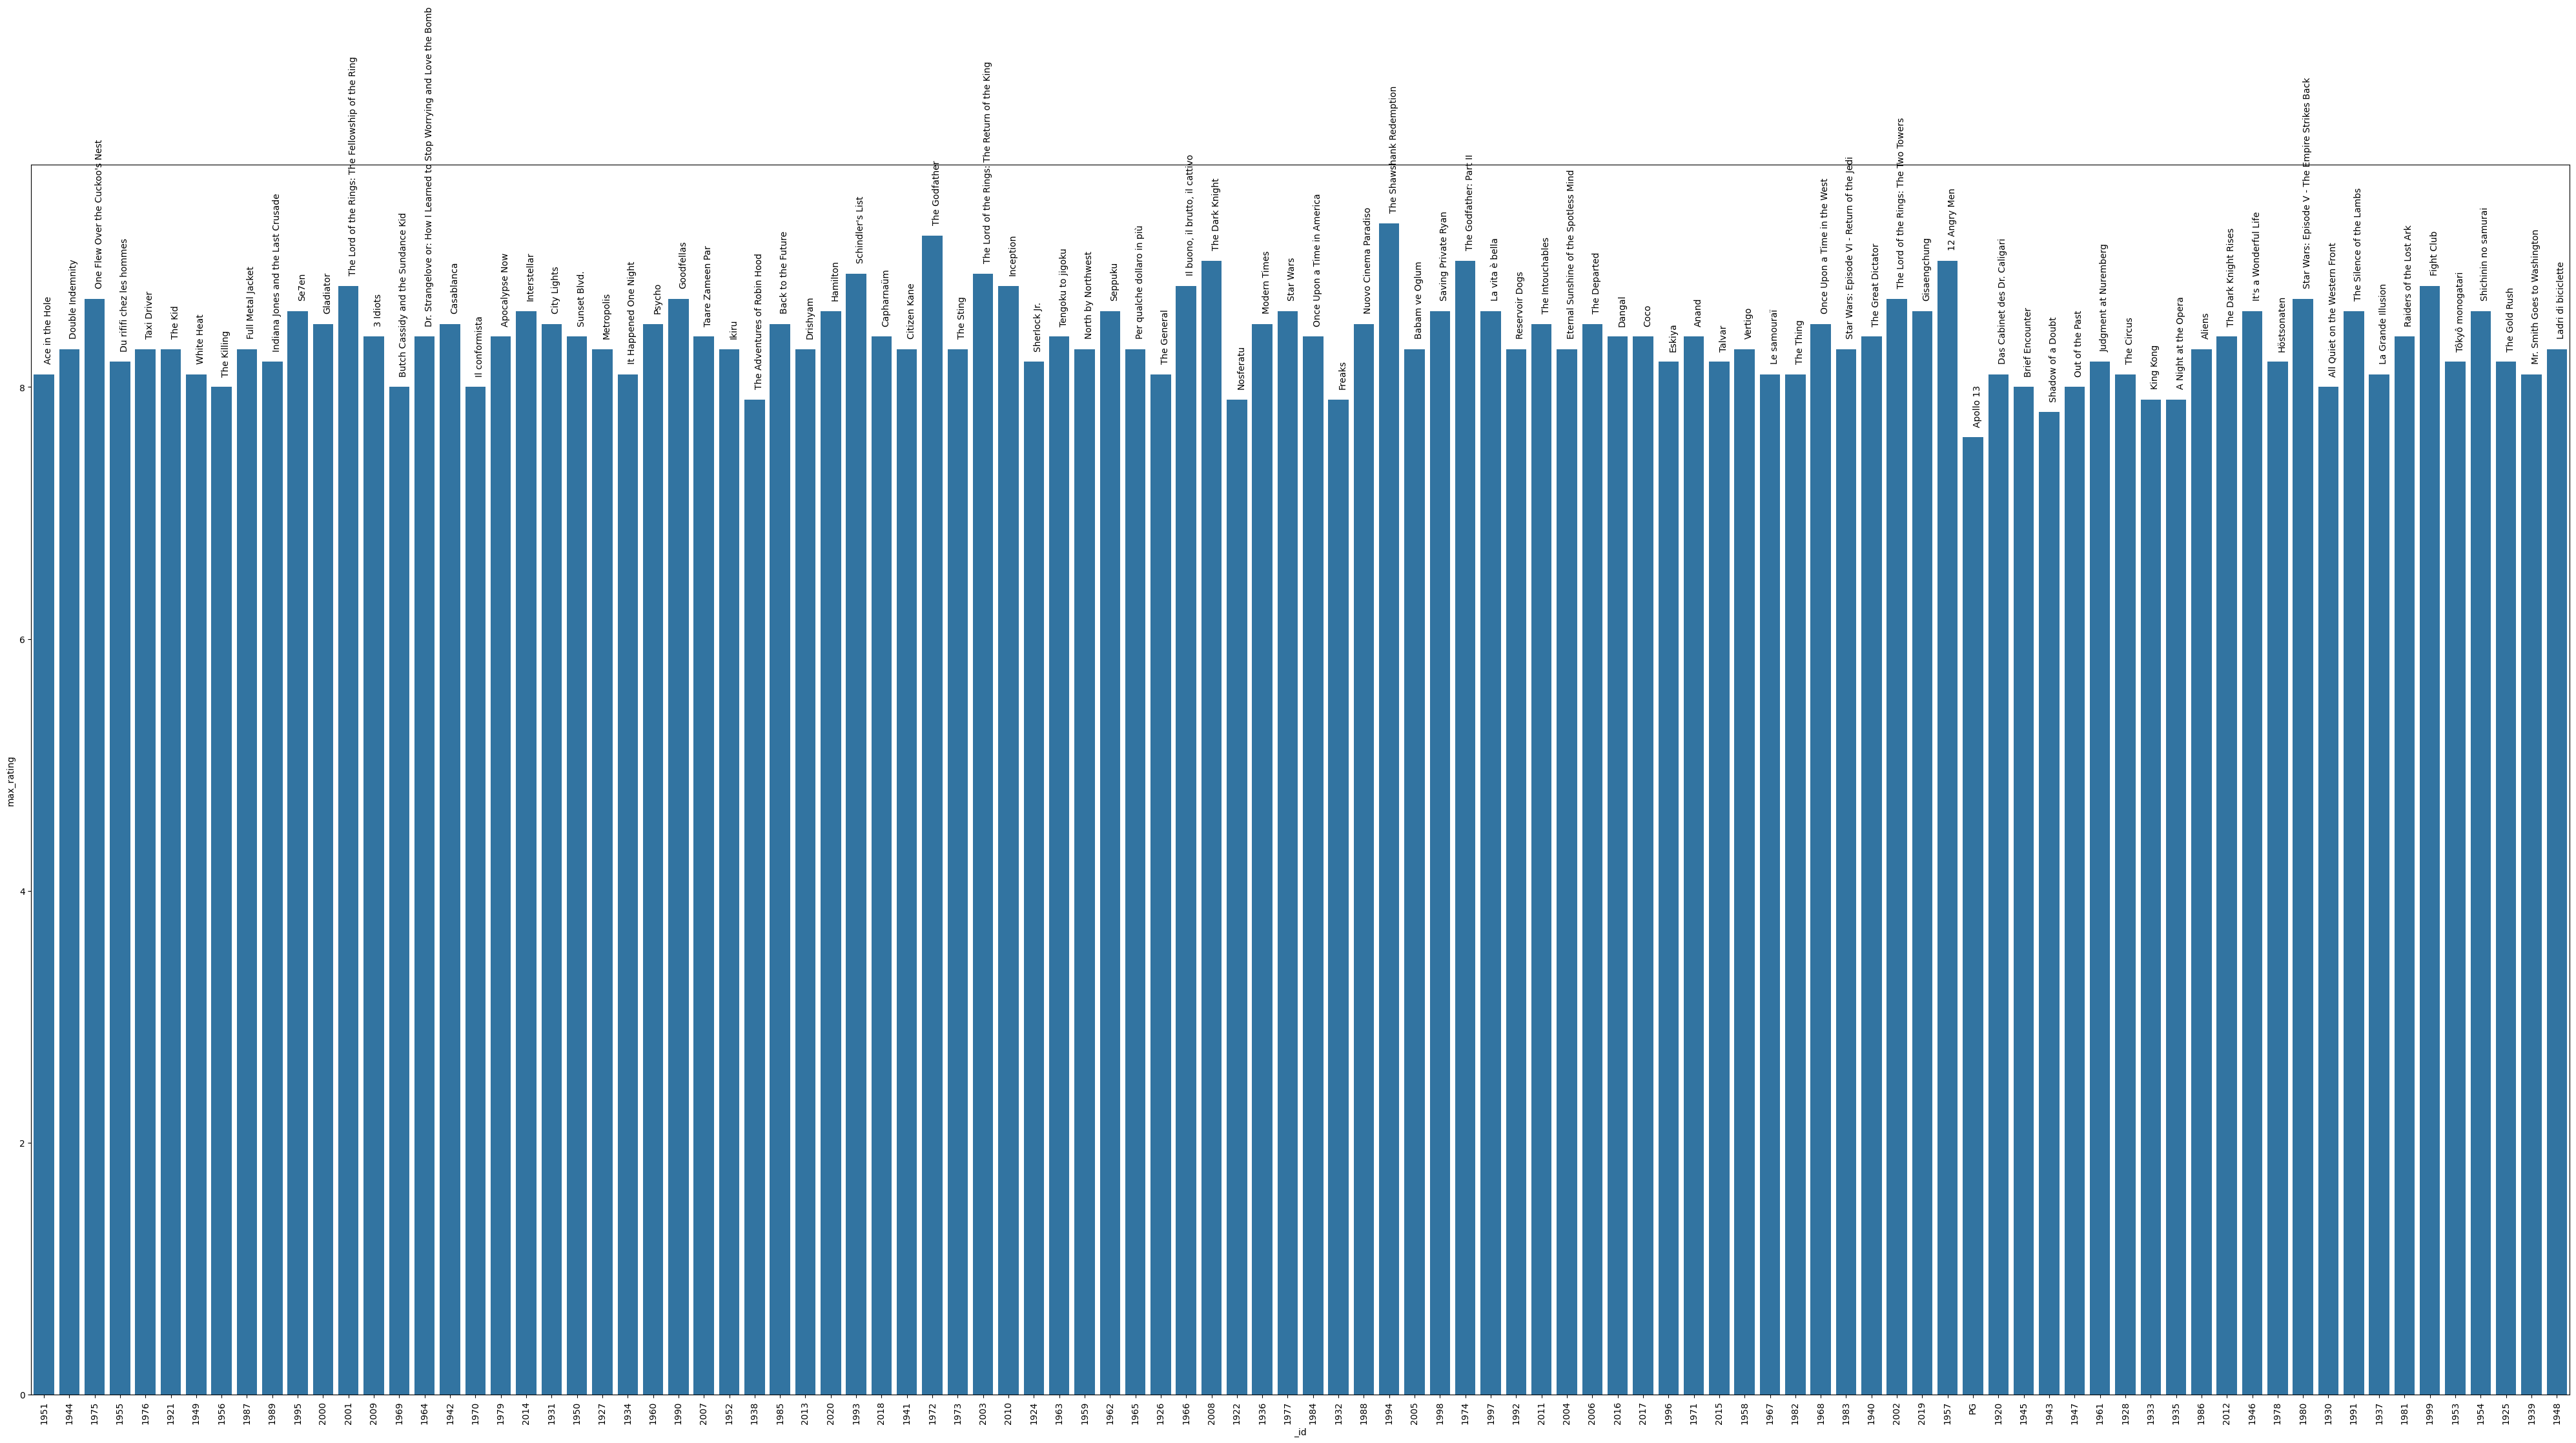

In [18]:
import seaborn as sns

plt.figure(figsize=(40, 20))
ax = sns.barplot(x=df["_id"], y=df["max_rating"])
plt.xticks(rotation=90)  
plt.tight_layout()

for bar, label in zip(ax.patches, df["title"]):
    ax.text(bar.get_x() + bar.get_width()/2,
            bar.get_height() + 0.1, 
            label,
            rotation=90,)

plt.show()

Zad4

In [ ]:
import requests

TOKEN = 'CUBVOtUQemqFjRflquhBktFXRBrDesCm'
url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/stations'
headers = {'token': TOKEN}
params = {
    'locationid': 'FIPS:PL',
    'limit': 100  
}

response = requests.get(url, headers=headers, params=params)
if response.status_code == 200:
    stations = response.json()['results']
    for s in stations:
        print(f"{s['id']}: {s['name']}")
else:
    print('Błąd:', response.status_code, response.text)


GHCND:PL000012120: LEBA, PL
GHCND:PL000012385: SIEDLCE, PL
GHCND:PLM00012160: ELBLAG MILEJEWO, PL
GHCND:PLM00012205: SZCZECIN, PL
GHCND:PLM00012295: BIALYSTOK, PL
GHCND:PLM00012330: LAWICA, PL
GHCND:PLM00012375: OKECIE, PL
GHCND:PLM00012424: STRACHOWICE, PL
GHCND:PLM00012497: WLODAWA, PL
GHCND:PLM00012566: BALICE, PL


In [63]:
import requests

TOKEN = 'CUBVOtUQemqFjRflquhBktFXRBrDesCm'
url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/data'
headers = {'token': TOKEN}
params = {
    'datasetid': 'GHCND',
    'stationid': 'GHCND:PLM00012375',
    'startdate': '2015-01-01',
    'enddate': '2015-12-31',
    'datatypeid': ['TAVG', 'TMAX', 'TMIN'],
    'limit': 1000
}

response = requests.get(url, headers=headers, params=params)
if response.status_code == 200:
    data = response.json()
    print(len(data.get('results', [])), "rekordów")
    print(data.get('results', []))
else:
    print('Błąd:', response.status_code, response.text)


627 rekordów
[{'date': '2015-01-01T00:00:00', 'datatype': 'TAVG', 'station': 'GHCND:PLM00012375', 'attributes': 'H,,S,', 'value': 16}, {'date': '2015-01-01T00:00:00', 'datatype': 'TMIN', 'station': 'GHCND:PLM00012375', 'attributes': ',,S,', 'value': -12}, {'date': '2015-01-02T00:00:00', 'datatype': 'TAVG', 'station': 'GHCND:PLM00012375', 'attributes': 'H,,S,', 'value': 40}, {'date': '2015-01-02T00:00:00', 'datatype': 'TMIN', 'station': 'GHCND:PLM00012375', 'attributes': ',,S,', 'value': 10}, {'date': '2015-01-03T00:00:00', 'datatype': 'TAVG', 'station': 'GHCND:PLM00012375', 'attributes': 'H,,S,', 'value': 31}, {'date': '2015-01-03T00:00:00', 'datatype': 'TMAX', 'station': 'GHCND:PLM00012375', 'attributes': ',,S,', 'value': 56}, {'date': '2015-01-04T00:00:00', 'datatype': 'TAVG', 'station': 'GHCND:PLM00012375', 'attributes': 'H,,S,', 'value': 21}, {'date': '2015-01-04T00:00:00', 'datatype': 'TMAX', 'station': 'GHCND:PLM00012375', 'attributes': ',,S,', 'value': 36}, {'date': '2015-01-04T

In [64]:
import requests

TOKEN = 'CUBVOtUQemqFjRflquhBktFXRBrDesCm'
url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/data'
headers = {'token': TOKEN}
params_2025 = {
    'datasetid': 'GHCND',
    'stationid': 'GHCND:PLM00012375',
    'startdate': '2024-01-01',
    'enddate': '2024-12-31',
    'datatypeid': ['TAVG', 'TMAX', 'TMIN'],
    'limit': 1000
}

response_2025 = requests.get(url, headers=headers, params=params_2025)
if response_2025.status_code == 200:
    data_2025 = response_2025.json()
    print(len(data_2025.get('results', [])), "rekordów (2025)")
    print(data_2025.get('results', []))
else:
    print('Błąd:', response_2025.status_code, response_2025.text)


785 rekordów (2025)
[{'date': '2024-01-01T00:00:00', 'datatype': 'TAVG', 'station': 'GHCND:PLM00012375', 'attributes': 'H,,S,', 'value': 28}, {'date': '2024-01-02T00:00:00', 'datatype': 'TAVG', 'station': 'GHCND:PLM00012375', 'attributes': 'H,,S,', 'value': 44}, {'date': '2024-01-03T00:00:00', 'datatype': 'TAVG', 'station': 'GHCND:PLM00012375', 'attributes': 'H,,S,', 'value': 56}, {'date': '2024-01-04T00:00:00', 'datatype': 'TAVG', 'station': 'GHCND:PLM00012375', 'attributes': 'H,,S,', 'value': 59}, {'date': '2024-01-04T00:00:00', 'datatype': 'TMAX', 'station': 'GHCND:PLM00012375', 'attributes': ',,S,', 'value': 81}, {'date': '2024-01-05T00:00:00', 'datatype': 'TAVG', 'station': 'GHCND:PLM00012375', 'attributes': 'H,,S,', 'value': -18}, {'date': '2024-01-05T00:00:00', 'datatype': 'TMAX', 'station': 'GHCND:PLM00012375', 'attributes': ',,S,', 'value': 46}, {'date': '2024-01-06T00:00:00', 'datatype': 'TAVG', 'station': 'GHCND:PLM00012375', 'attributes': 'H,,S,', 'value': -24}, {'date': '2

In [ ]:
mycol = mydb['weather']
mycol.delete_many({})
if 'results' in data and data['results']:
    mycol.insert_many(data['results'])
    print(f"Wstawiono {len(data['results'])} rekordów z 2015 roku")
else:
    print("Brak danych z 2015 do zapisania.")

if 'results' in data_2025 and data_2025['results']:
    mycol.insert_many(data_2025['results'])
    print(f"Wstawiono {len(data_2025['results'])} rekordów z 2024 roku")
else:
    print("Brak danych z 2024 do zapisania.")

Wstawiono 627 rekordów z 2015 roku
Wstawiono 785 rekordów z 2025 roku


In [ ]:
data = list(mycol.find({
    "datatype": "TAVG",
    "$or": [
        {"date": {"$regex": "^2015"}},
        {"date": {"$regex": "^2024"}}
    ]
}))

df = pd.DataFrame(data)
print(df.head())  


                        _id                 date datatype            station  \
0  684731a3b3b732ba5e1221b4  2015-01-01T00:00:00     TAVG  GHCND:PLM00012375   
1  684731a3b3b732ba5e1221b6  2015-01-02T00:00:00     TAVG  GHCND:PLM00012375   
2  684731a3b3b732ba5e1221b8  2015-01-03T00:00:00     TAVG  GHCND:PLM00012375   
3  684731a3b3b732ba5e1221ba  2015-01-04T00:00:00     TAVG  GHCND:PLM00012375   
4  684731a3b3b732ba5e1221bd  2015-01-05T00:00:00     TAVG  GHCND:PLM00012375   

  attributes  value  
0      H,,S,     16  
1      H,,S,     40  
2      H,,S,     31  
3      H,,S,     21  
4      H,,S,      2  


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['temp'] = df['value'] /10 


In [81]:
monthly_avg = df.groupby(['year', 'month'])['temp'].mean().reset_index()
print(monthly_avg)


    year  month       temp
0   2015      1   1.416129
1   2015      2   1.171429
2   2015      3   5.641935
3   2015      4   8.663333
4   2015      5  13.458065
5   2015      6  17.876667
6   2015      7  20.280645
7   2015      8  23.396774
8   2015      9  15.530000
9   2015     10   7.761290
10  2015     11   5.330000
11  2015     12   4.800000
12  2024      1  -0.222581
13  2024      2   6.113793
14  2024      3   5.740741
15  2024      4  11.113333
16  2024      5  17.726667
17  2024      6  19.716667
18  2024      7  21.977419
19  2024      8  21.456667
20  2024      9  18.656667
21  2024     10  10.000000
22  2024     11   3.930769
23  2024     12   2.843333


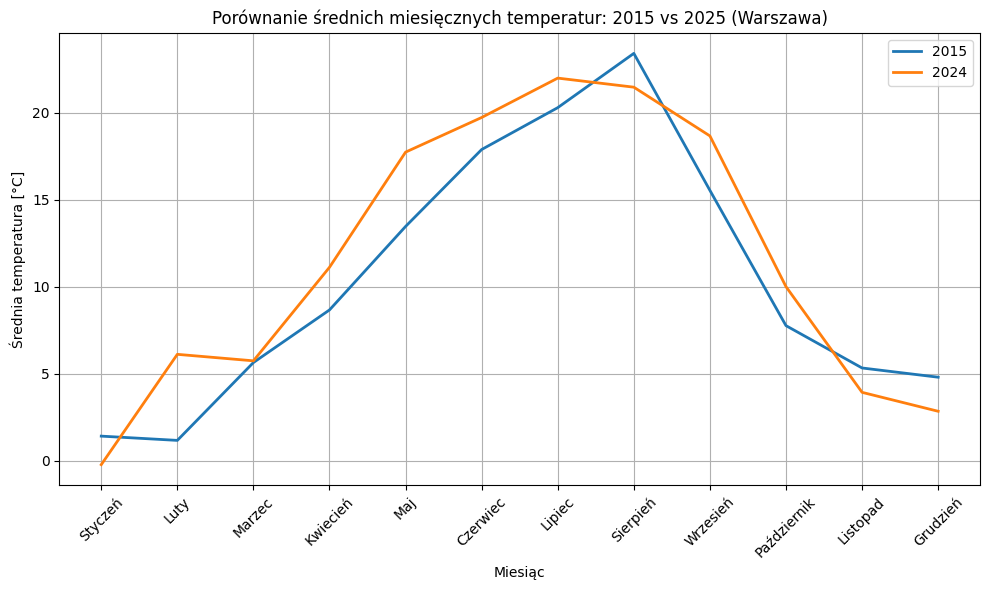

In [83]:
import matplotlib.pyplot as plt

avg_2015 = monthly_avg[monthly_avg['year'] == 2015]
avg_2025 = monthly_avg[monthly_avg['year'] == 2024]

plt.figure(figsize=(10,6))
plt.plot(avg_2015['month'], avg_2015['temp'], label='2015', linewidth=2)
plt.plot(avg_2025['month'], avg_2025['temp'], label='2024', linewidth=2)

plt.xticks(range(1,13), [
    'Styczeń', 'Luty', 'Marzec', 'Kwiecień', 'Maj', 'Czerwiec', 
    'Lipiec', 'Sierpień', 'Wrzesień', 'Październik', 'Listopad', 'Grudzień'
], rotation=45)
plt.ylabel('Średnia temperatura [°C]')
plt.xlabel('Miesiąc')
plt.title('Porównanie średnich miesięcznych temperatur: 2015 vs 2025 (Warszawa)')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()
